In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")
df.shape

(363861, 6)

In [3]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
351294,351294,157458,480129,How can I boost my cell phone signal at home?,How can you boost your cell phone signal?,0
48594,48594,86614,86615,Music Theory: What is an octave?,How do I learn music theory for the violin?,0
128320,128320,206394,198268,Can you hide friends from you Facebook friend ...,How do you hide friends on Facebook?,1
53787,53787,95034,95035,What would be your ideal society?,What is an ideal society?,0
54106,54106,95555,95556,How do you send a text message from the US to ...,Is it legal to send a fake text message to sca...,0
108910,108910,178844,178845,Why air at 25℃ feels warmer than water at 25℃?,Why does water feel colder than air?,0
167440,167440,19892,43677,Why MS Dhoni leave captaincy of ODI & T-20?,Why did Dhoni leave the captaincy?,1
188546,188546,287120,287121,It's the summer holidays and I am about to go ...,If a guy-friend starts to text a lot more and ...,0
245169,245169,357948,357949,How do I repair my relationship after I cheated?,How can you repair your relationship after you...,0
316575,316575,345795,441653,Was Mohammad and the Quran influenced by an he...,The Quran: Is there a version of the Qur'an's ...,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363861 entries, 0 to 363860
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            363861 non-null  int64 
 1   qid1          363861 non-null  int64 
 2   qid2          363861 non-null  int64 
 3   question1     363860 non-null  object
 4   question2     363859 non-null  object
 5   is_duplicate  363861 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 16.7+ MB


In [5]:
# missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [6]:
# duplicate rows
df.duplicated().sum()

np.int64(0)

0    255027
1    149263
Name: is_duplicate, dtype: int64
0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64


<AxesSubplot:>

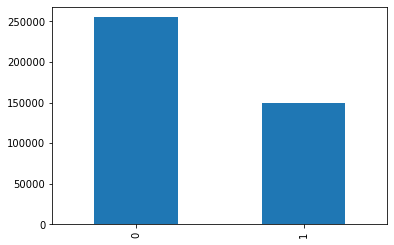

In [17]:
# Distribution of duplicate and non-duplicate questions

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [7]:
# Repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 493889
Number of questions getting repeated 98895


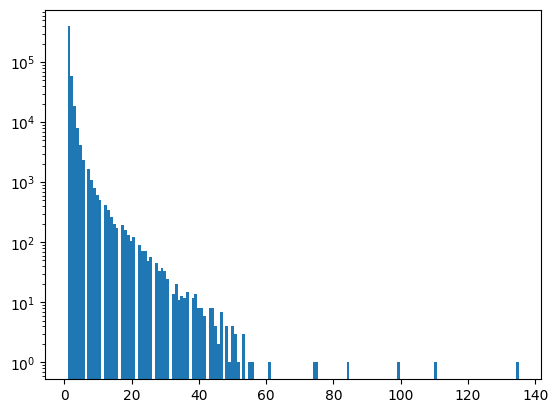

In [8]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()